In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
from os import path

data_dir  = 'data/spaceship-titanic'
data_file = 'train_clean.csv'
data_path = path.join(data_dir, data_file)

df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6606 non-null   int64  
 1   HomePlanet       6606 non-null   object 
 2   CryoSleep        6606 non-null   bool   
 3   Cabin            6606 non-null   object 
 4   Destination      6606 non-null   object 
 5   Age              6606 non-null   float64
 6   VIP              6606 non-null   bool   
 7   RoomService      6606 non-null   float64
 8   FoodCourt        6606 non-null   float64
 9   ShoppingMall     6606 non-null   float64
 10  Spa              6606 non-null   float64
 11  VRDeck           6606 non-null   float64
 12  Name             6606 non-null   object 
 13  Transported      6606 non-null   bool   
 14  PassengerGroup   6606 non-null   int64  
 15  PassengerNumber  6606 non-null   int64  
 16  CabinDeck        6606 non-null   object 
 17  CabinNumber   

In [3]:
labels = df.pop('Transported')
df.drop(columns='Unnamed: 0', inplace=True)

# O QUE DEVE SER FEITO NESSE NOTEBOOK

### Visualizar relações entre os dados com uns plot muito louco

### Visualizando `TotalSpent` por `CabinDeck`

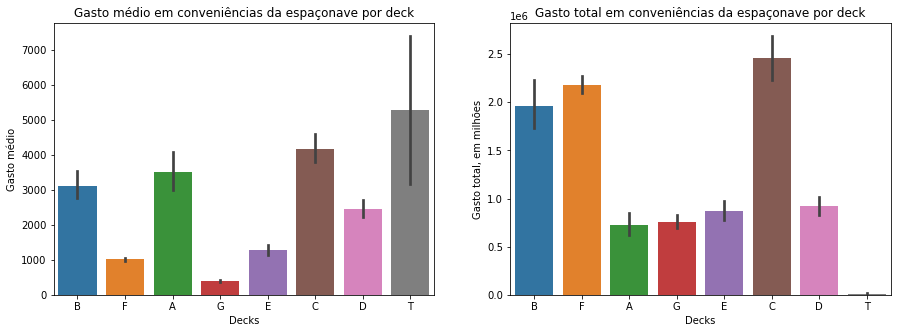

In [31]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

_ = sns.barplot(data=df, x='CabinDeck', y='TotalSpent', estimator=np.mean, ax=axs[0])
_ = sns.barplot(data=df, x='CabinDeck', y='TotalSpent', estimator=np.sum, ax=axs[1])

_ = axs[0].set_title("Gasto médio em conveniências da espaçonave por deck")
_ = axs[0].set_xlabel("Decks")
_ = axs[0].set_ylabel("Gasto médio")

_ = axs[1].set_title("Gasto total em conveniências da espaçonave por deck")
_ = axs[1].set_xlabel("Decks")
_ = axs[1].set_ylabel("Gasto total, em milhões")

#### O deck T, embora possua o maior gasto médio (com alta variância), possui de longe o menor gasto total. Parece que poucas pessoas residem nesse deck.
#### Isso nos leva a perguntar: quantas pessoas residem em cada cabine?

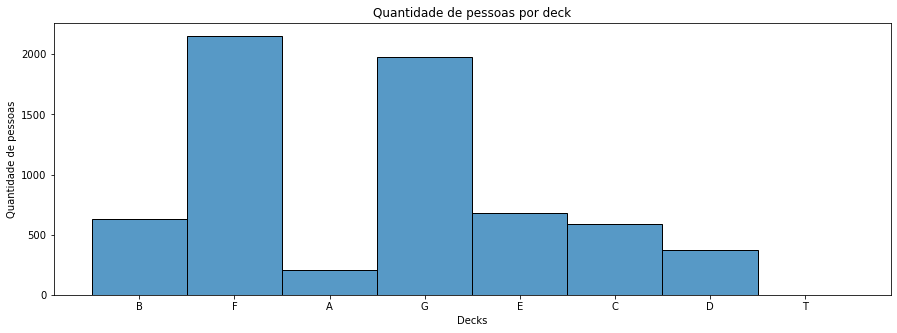

In [26]:
_, axs = plt.subplots(1, figsize=(15, 5))

_ = sns.histplot(data=df, x='CabinDeck', ax=axs)
_ = axs.set_title("Quantidade de pessoas por deck")
_ = axs.set_xlabel("Decks")
_ = axs.set_ylabel("Quantidade de pessoas")

#### De fato, nesse deck, residem apenas:

In [29]:
df[ df['CabinDeck'] == 'T' ]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNumber,CabinDeck,CabinNumber,CabinSide,TotalSpent
1680,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,Mergak Headfair,2414,1,T,1,P,7411.0
2061,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,Pent Sessiouse,2971,1,T,3,P,3164.0


In [5]:
assert 1 + 1 == 3, "kkkk os debug tão diferente hein"

AssertionError: kkkk os debug tão diferente hein

In [ ]:
df.info()

### Transformando `PassengerId` em `PassengerGroup` e `PassengerNumber`

In [ ]:
assert df['PassengerId'].apply(lambda x: isinstance(x, str)).all()

df[['PassengerGroup', 'PassengerNumber']] = df['PassengerId'].str.split('_', expand=True)
df.drop(columns='PassengerId', inplace=True)

In [ ]:
df.head(5)

### `Cabin` e `PassengerGroup` são extremamente entrelaçados?

Resposta: um pouco.

In [ ]:
assert not df['PassengerGroup'].isna().any()

def empty_cabins_and_relatives(df: pd.DataFrame):
    aux_df = df[ df['Cabin'].isna() ]
    names  = aux_df['Name']
    groups = aux_df['PassengerGroup']
    
    for group in groups:
        yield df[ df['PassengerGroup'] == group ][['Name', 'Cabin', 'PassengerGroup', 'PassengerNumber']]
    

group_gen = empty_cabins_and_relatives(df)
for _ in range(100):
    print(next(group_gen))
    print()

### Eliminando todos os nulos

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [ ]:
df.info()

### Tratando `Cabin`

In [ ]:
df[['CabinDeck', 'CabinNumber', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
df.info()

### Criando atributo `TotalSpent` para armazenar quanto aquele passageiro gastou no total

In [ ]:
money_attribs = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['TotalSpent'] = df[money_attribs].sum(axis=1)
df.head(10)

In [ ]:
df.info()

In [ ]:
new_data_file = 'train_treated.csv'
new_data_path = path.join(data_dir, new_data_file)

df.to_csv(new_data_path)